In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [55]:
df = pd.read_csv("movie_metadata.csv")

In [56]:
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [71]:
df.shape

(5043, 28)

In [73]:
df = df.drop_duplicates()
df.shape

(4998, 28)

In [74]:
def create_comparison_database(name, value, x, no_films):
    
    if name == 'actors':
        comparison_df = actors_df.groupby(name, as_index=False)
    else:
        comparison_df = df.groupby(name, as_index=False)
    
    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    elif x == 'sum':
        comparison_df = comparison_df.sum() 
    
    # Create database with either name of directors or actors, the value being compared i.e. 'gross',
    # and number of films they're listed with. Then sort by value being compared.
    if name == 'actors':
        name_count_key = actors_df[name].value_counts().to_dict()
    else:
        name_count_key = df[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    comparison_df.sort_values(value, ascending=False, inplace=True)
    comparison_df[name] = comparison_df[name].map(str) + " (" + comparison_df['films'].astype(str) + ")"
   
    # create a Series with the name as the index so it can be plotted to a subgrid
    comp_series = comparison_df[comparison_df['films'] >= no_films][[name, value]][10::-1].set_index(name).ix[:,0]
    
    return comp_series

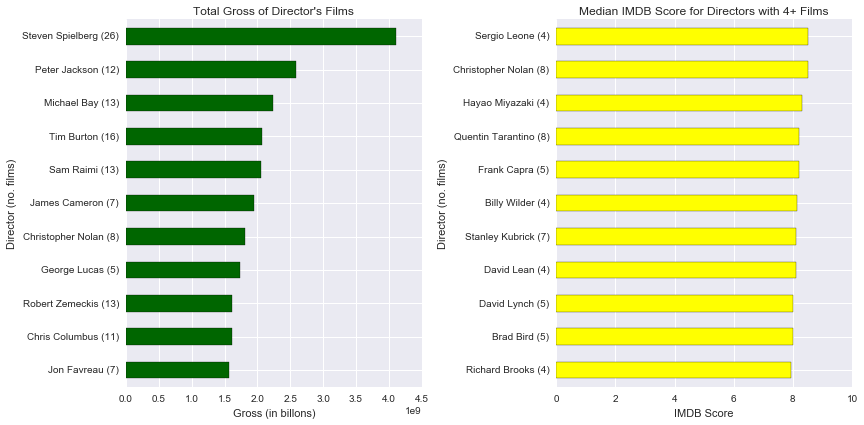

In [75]:
fig = plt.figure(figsize=(18,6))

# Director_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('director_name','gross','sum', 0).plot(kind='barh', color='#006600')
plt.legend().set_visible(False)
plt.title("Total Gross of Director's Films")
plt.ylabel("Director (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('director_name','imdb_score','median', 4).plot(kind='barh', color='#ffff00')
plt.legend().set_visible(False)
plt.title('Median IMDB Score for Directors with 4+ Films')
plt.ylabel("Director (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

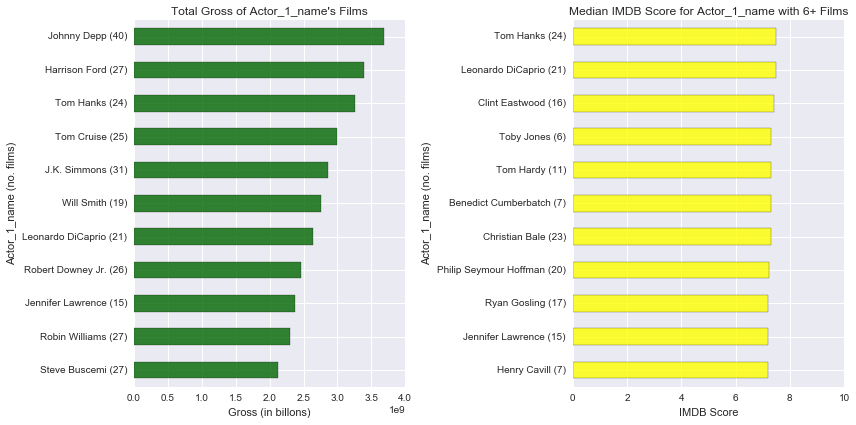

In [76]:
fig = plt.figure(figsize=(18,6))

# Actor_1_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('actor_1_name','gross','sum', 0).plot(kind='barh', color='#006600', alpha=.8)
plt.legend().set_visible(False)
plt.title("Total Gross of Actor_1_name's Films")
plt.ylabel("Actor_1_name (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('actor_1_name','imdb_score','median', 6).plot(kind='barh', color='#ffff00', alpha=.8)
plt.legend().set_visible(False)
plt.title('Median IMDB Score for Actor_1_name with 6+ Films')
plt.ylabel("Actor_1_name (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

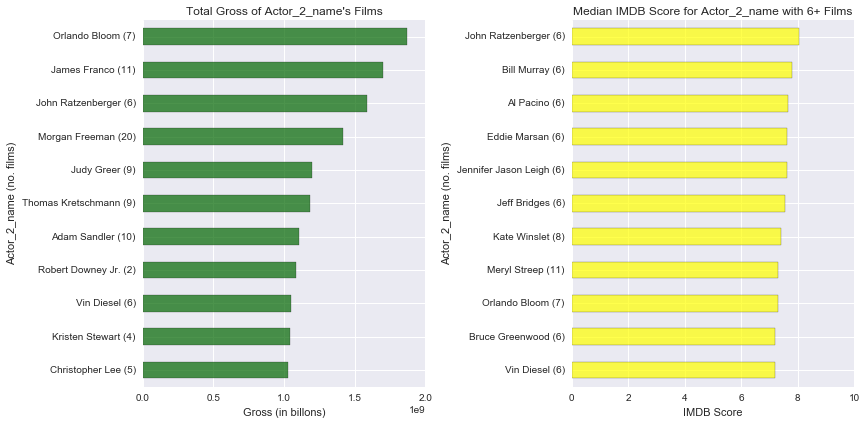

In [77]:


fig = plt.figure(figsize=(18,6))

# Actor_2_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('actor_2_name','gross','sum', 0).plot(kind='barh', color='#006600', alpha=.7)
plt.legend().set_visible(False)
plt.title("Total Gross of Actor_2_name's Films")
plt.ylabel("Actor_2_name (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('actor_2_name','imdb_score','median', 6).plot(kind='barh', color='#ffff00', alpha=.7)
plt.legend().set_visible(False)
plt.title('Median IMDB Score for Actor_2_name with 6+ Films')
plt.ylabel("Actor_2_name (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

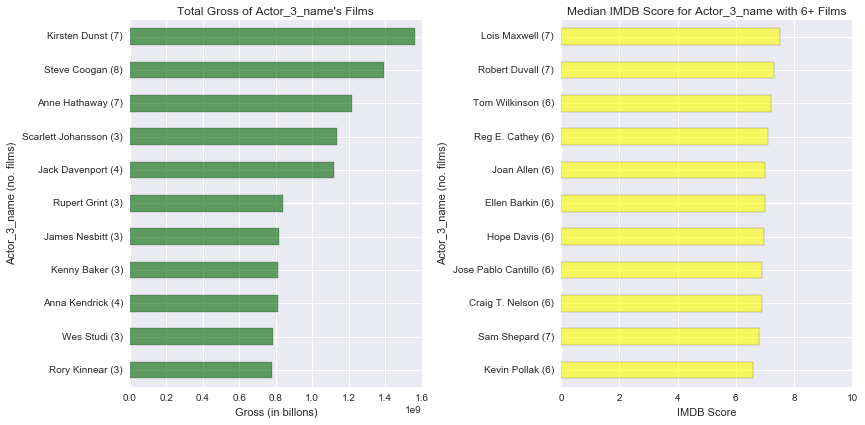

In [78]:
fig = plt.figure(figsize=(18,6))

# Actor_3_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('actor_3_name','gross','sum', 0).plot(kind='barh', color='#006600', alpha=.6)
plt.legend().set_visible(False)
plt.title("Total Gross of Actor_3_name's Films")
plt.ylabel("Actor_3_name (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('actor_3_name','imdb_score','median', 6).plot(kind='barh', color='#ffff00', alpha=.6)
plt.legend().set_visible(False)
plt.title('Median IMDB Score for Actor_3_name with 6+ Films')
plt.ylabel("Actor_3_name (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

In [79]:
actors_df = df[['movie_title','actor_1_name','actor_2_name','actor_3_name','gross','imdb_score']]
actors_df = pd.lreshape(actors_df, {'actors': ['actor_1_name','actor_2_name','actor_3_name']})
actors_df.shape

(14951, 4)

In [80]:
actors_df.head()

,gross,imdb_score,movie_title,actors
0,760505847.0,7.9,Avatar,CCH Pounder
1,309404152.0,7.1,Pirates of the Caribbean: At World's End,Johnny Depp
2,200074175.0,6.8,Spectre,Christoph Waltz
3,448130642.0,8.5,The Dark Knight Rises,Tom Hardy
4,NaN,7.1,Star Wars: Episode VII - The Force Awakens ...,Doug Walker


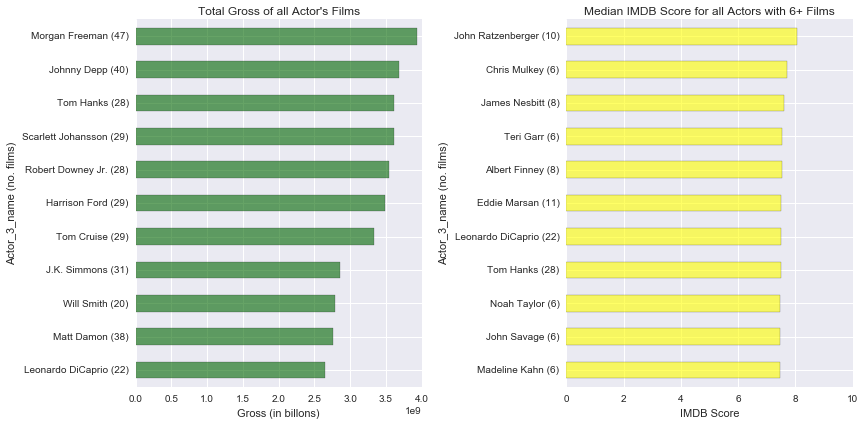

In [86]:
fig = plt.figure(figsize=(18,6))

# Actors
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('actors','gross','sum', 0).plot(kind='barh', color='#006600', alpha=.6)
plt.legend().set_visible(False)
plt.title("Total Gross of all Actor's Films")
plt.ylabel("Actor_3_name (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('actors','imdb_score','median', 6).plot(kind='barh', color='#ffff00', alpha=.6)
plt.legend().set_visible(False)
plt.title('Median IMDB Score for all Actors with 6+ Films')
plt.ylabel("Actor_3_name (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

In [87]:
actors_df[actors_df.actors == 'J.K. Simmons']

,gross,imdb_score,movie_title,actors
6,336530303.0,6.2,Spider-Man 3,J.K. Simmons
31,373377893.0,7.3,Spider-Man 2,J.K. Simmons
109,89732035.0,6.6,Terminator Genisys,J.K. Simmons
153,143523463.0,7.2,Kung Fu Panda 3,J.K. Simmons
160,403706375.0,7.3,Spider-Man,J.K. Simmons
199,148337537.0,7.3,Megamind,J.K. Simmons
507,67286731.0,6.7,Hidalgo,J.K. Simmons
745,54910560.0,6.3,The Jackal,J.K. Simmons
984,35168395.0,6.5,For Love of the Game,J.K. Simmons
1206,71347010.0,7.1,"I Love You, Man",J.K. Simmons


In [95]:
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [96]:
df.color.value_counts()

Color               4772
 Black and White     207
Name: color, dtype: int64

What genres rate higher, gross higher
plot_keywords used in highest grossing and rated films


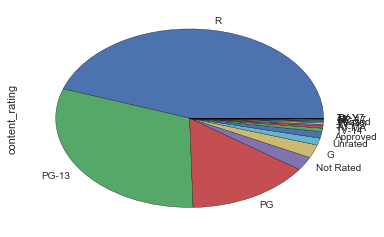

In [111]:
df.content_rating.value_counts().plot(kind='pie')